In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import random

In [2]:
#randomly generating the ranges
ranges = []
#stores (ai, bi)
for i in range(5):
    a = [random.randint(0, 50), random.randint(50, 100)]
    ranges.append(a)
ranges = np.array(ranges)
ranges

array([[31, 96],
       [24, 68],
       [35, 60],
       [20, 81],
       [18, 88]])

In [3]:
#computing the midpoints of the above ranges
c = []
for rng in ranges:
    midpt = (rng[0]+rng[1])/2
    c.append(midpt)
c = np.array(c)
c

array([63.5, 46. , 47.5, 50.5, 53. ])

In [4]:
#randomly selecting the important features
imp_features = np.array(random.sample(range(0, 4), 2))
imp_features

array([0, 2])

In [5]:
#generated the datapoints uniformly within the precomputed range boundaries
X=np.zeros((1000, 5))
for i in range(5):
    X[:, i] = np.random.uniform(ranges[i, 0], ranges[i, 1], 1000)
X

array([[58.35875711, 43.54566726, 42.59954958, 21.1743669 , 55.63376712],
       [89.76534433, 39.53215215, 48.0711703 , 58.55320664, 39.76562419],
       [73.11643971, 38.10972284, 59.23995537, 37.81161166, 45.03169213],
       ...,
       [49.25978171, 31.91573835, 38.17147594, 26.22903167, 52.72571773],
       [43.1020999 , 55.05440632, 53.85414223, 42.73347327, 84.3461486 ],
       [89.50857997, 34.66637725, 50.13402421, 65.75483509, 24.51418624]])

In [6]:
y=np.zeros(1000)
fi, fj = imp_features[0], imp_features[1]
ci, cj = c[fi], c[fj]
for t in range(1000):
    xi, xj = X[t, fi], X[t, fj] 
    if xi > ci and xj > cj:
        y[t] = np.random.choice([0, 1], p=[0.2, 0.8])
    elif xi < ci and xj < xj:
        y[t] = np.random.choice([0, 1], p=[0.8, 0.2])
    else:
        y[t] = np.random.choice([0, 1], p=[0.5, 0.5])
y = y.reshape(-1, 1)
y

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [7]:
#divided the dataset randomly into 80% train data and20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
#imported the model and fitted the train data into it
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.525

In [10]:
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']

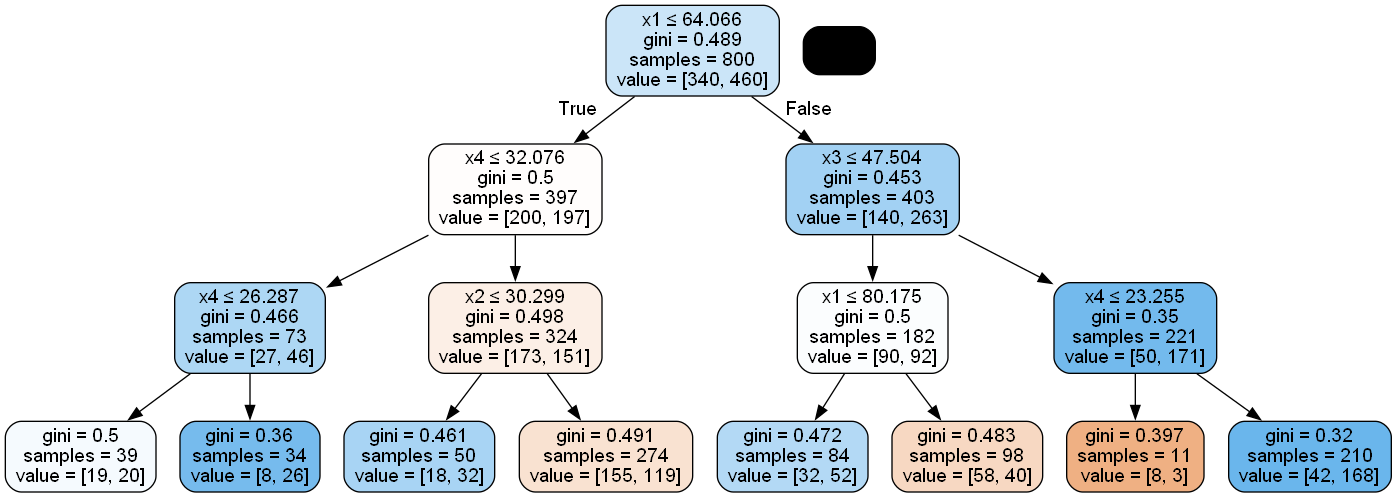

In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())